In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import somoclu
import datetime
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import cdist, cosine, euclidean, minkowski, mahalanobis 
from matplotlib import pyplot as plt
from matplotlib import ticker, style

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [25]:
labels = pd.read_pickle("tmp/labels-e300k.pkl")
indicators = pd.read_pickle("tmp/indicators-e300k.pkl")

In [22]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
normalized = scaler.fit_transform(indicators)

In [ ]:
# COSINE

In [7]:
distances_cosine = []

for i in range(0, normalized.shape[0]):
    distances_cosine.append(sum(cdist([normalized[i]], normalized, 'cosine')[0]))

In [48]:
np.mean(distances_cosine)

22344.142824446491

In [49]:
min = np.int64(np.min(distances_cosine))
min

14112

In [50]:
max = np.int64(np.max(distances_cosine))
max

40212

In [51]:
ind = np.argpartition(distances_cosine, -25)[-25:]
labels[ind]

36264    1897050
27139     791873
40762    1745874
22254    1215601
44485    1684202
35564     922893
10097    2277614
21900     873545
46316    2425542
4006     1491382
26905     251829
26286     817309
46213    1530898
7708      849949
16228    1002933
18754    2010722
15554    1630110
49785    1397954
31636    1629810
49900    2940254
24373    1530902
30497    1737130
8034     2327430
18066     621353
19177     965501
Name: s.smlouva_id, dtype: object

In [52]:
binwidth = 1000

fig, axes = plt.subplots()
axes.set_xlabel("vzdálenost k ostatním smlouvám")
axes.set_ylabel("počet smluv")
axes.hist(distances_cosine, bins=range((min // 1000) * 1000, ((max // 1000) + 1) * 1000, binwidth), rwidth=1)
# fig.savefig("vystup/ceny-6.pdf", bbox_inches='tight')

(array([  2.24800000e+03,   3.66200000e+03,   6.23300000e+03,
          4.25500000e+03,   2.30100000e+03,   2.16000000e+03,
          1.75500000e+03,   1.69300000e+03,   2.13700000e+03,
          1.83000000e+03,   2.73600000e+03,   3.20100000e+03,
          3.07300000e+03,   2.94600000e+03,   4.78300000e+03,
          1.89100000e+03,   1.23800000e+03,   7.56000000e+02,
          4.67000000e+02,   3.03000000e+02,   1.29000000e+02,
          8.30000000e+01,   6.80000000e+01,   4.40000000e+01,
          6.00000000e+00,   1.00000000e+00]),
 array([14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000,
        23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000,
        32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000]),
 <a list of 26 Patch objects>)

In [10]:
# EUCLIDEAN

In [10]:
distances_euclidean = []

for i in range(0, normalized.shape[0]):
    distances_euclidean.append(sum(cdist([normalized[i]], normalized, 'euclidean')[0]))

In [11]:
np.mean(distances_euclidean)

225277.3443134763

In [12]:
min = np.int64(np.min(distances_euclidean))
min

162699

In [13]:
max = np.int64(np.max(distances_euclidean))
max

487824

In [14]:
ind = np.argpartition(distances_euclidean, -25)[-25:]
labels[ind]

162491    3604136
174877    2473546
42919      731029
147811    1285589
71049     1629870
142473    3752876
187861    2860130
15554     1630110
82405     2829618
31636     1629810
51375      188345
101085    2883538
98865     1065213
130979     559101
108826    1093605
30953     2139526
36129     1335322
174109    1401454
85312     1266557
80934      919625
9738      1629282
133499    2903218
137880    3225594
152737    1004561
183444    1574966
Name: s.smlouva_id, dtype: object

(array([1.3512e+04, 2.2821e+04, 1.1680e+04, 6.8510e+03, 4.6780e+03,
        4.2580e+03, 4.3280e+03, 3.9490e+03, 4.0370e+03, 3.7310e+03,
        2.3806e+04, 5.2770e+03, 7.4920e+03, 2.1440e+03, 3.9720e+03,
        1.3950e+04, 6.2560e+03, 3.0390e+03, 3.4550e+03, 5.4060e+03,
        3.4700e+03, 4.6560e+03, 2.7660e+03, 6.3560e+03, 4.0020e+03,
        2.5350e+03, 1.7470e+03, 1.7270e+03, 2.7540e+03, 4.0590e+03,
        1.7850e+03, 1.9370e+03, 1.4740e+03, 8.5500e+02, 7.0400e+02,
        1.0150e+03, 6.6000e+02, 7.0800e+02, 4.5000e+02, 2.9900e+02,
        2.8900e+02, 2.0600e+02, 3.1600e+02, 1.4800e+02, 7.6000e+01,
        9.5000e+01, 4.6000e+01, 6.0000e+01, 4.8000e+01, 1.9000e+01,
        1.8000e+01, 2.9000e+01, 1.4000e+01, 5.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+01, 3.0000e+00, 7.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([162000, 167000, 172000, 177000, 182000, 187000, 192000, 197000,
        202000, 207000, 212000, 217000, 22

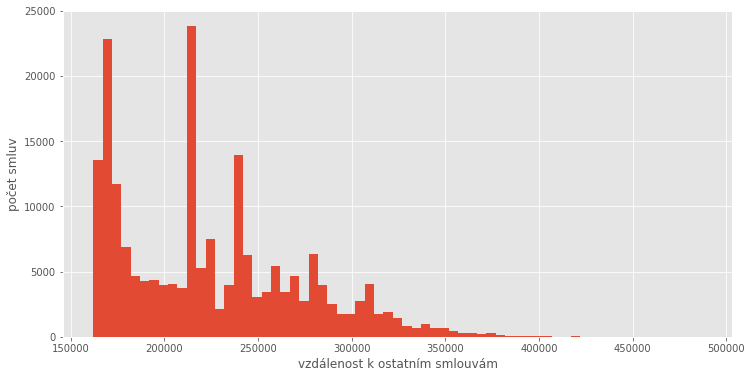

In [19]:
binwidth = 5000

fig, axes = plt.subplots()
axes.set_xlabel("vzdálenost k ostatním smlouvám")
axes.set_ylabel("počet smluv")
axes.hist(distances_euclidean, bins=range((min // 1000) * 1000, ((max // 1000) + 1) * 1000, binwidth), rwidth=1)
# fig.savefig("vystup/ceny-6.pdf", bbox_inches='tight')

In [54]:
# MINKOWSKI

In [54]:
distances_minkowski = []

for i in range(0, normalized.shape[0]):
    distances_minkowski.append(sum(cdist([normalized[i]], normalized, 'minkowski', 2)[0]))

In [55]:
np.mean(distances_minkowski)

53318.898344854577

In [56]:
min = np.int64(np.min(distances_minkowski))
min

37183

In [57]:
max = np.int64(np.max(distances_minkowski))
max

123298

In [58]:
ind = np.argpartition(distances_minkowski, -25)[-25:]
labels[ind]

14031     143653
42356     476049
14574     489441
25045    2126762
37500     939497
6754      301537
42919     731029
2544     1039301
47541    2023926
19177     965501
8034     2327430
24373    1530902
29023    1464658
39388    1236553
42665    2077246
32668      22681
46213    1530898
15554    1630110
319      3127598
30777    1692870
31636    1629810
27048    1275265
30953    2139526
9738     1629282
36129    1335322
Name: s.smlouva_id, dtype: object

In [59]:
binwidth = 1000

fig, axes = plt.subplots()
axes.set_xlabel("vzdálenost k ostatním smlouvám")
axes.set_ylabel("počet smluv")
axes.hist(distances_minkowski, bins=range((min // 1000) * 1000, ((max // 1000) + 1) * 1000, binwidth), rwidth=1)
# fig.savefig("vystup/ceny-6.pdf", bbox_inches='tight')

(array([  3.43400000e+03,   5.68500000e+03,   2.33600000e+03,
          3.22000000e+03,   1.86700000e+03,   1.04400000e+03,
          9.07000000e+02,   8.40000000e+02,   1.18100000e+03,
          8.56000000e+02,   6.97000000e+02,   1.17100000e+03,
          7.97000000e+02,   7.14000000e+02,   4.12000000e+02,
          3.88000000e+02,   2.99000000e+02,   2.70000000e+02,
          6.97000000e+02,   1.00600000e+03,   1.92200000e+03,
          2.02400000e+03,   1.15700000e+03,   2.96400000e+03,
          1.53300000e+03,   1.20700000e+03,   8.99000000e+02,
          6.78000000e+02,   1.20000000e+03,   6.94000000e+02,
          6.93000000e+02,   5.56000000e+02,   4.44000000e+02,
          4.84000000e+02,   3.14000000e+02,   2.22000000e+02,
          3.39000000e+02,   8.75000000e+02,   3.06000000e+02,
          8.15000000e+02,   6.63000000e+02,   3.18000000e+02,
          4.29000000e+02,   3.04000000e+02,   1.02000000e+02,
          1.57000000e+02,   9.30000000e+01,   9.60000000e+01,
        

In [5]:
# EUCLIDEAN - res

In [4]:
distances = np.ones(normalized.shape[0])

for i in range(0, normalized.shape[0]):
    distances[i]=np.sum(cdist([normalized[i]], normalized, 'euclidean')[0])

In [26]:
import pickle

with open('model/distance-e300k.pkl', 'rb') as fp:
    distances = pickle.load(fp)

In [27]:
np.mean(distances)

310876.1604088794

In [28]:
min = np.int64(np.min(distances))
min

217703

In [29]:
max = np.int64(np.max(distances))
max

709938

In [30]:
labels[np.argsort(distances)[-25:]]

111069    1657922
74716      830517
106684    4326808
1338      1718454
291220    4311328
112319    4127900
136691    2436642
158726    3213418
121021     704489
70572     2292714
112044    4313384
273279    2562002
107441    3102286
117796    4344668
116333    4134012
106903    2191926
185300    3201206
207209    2400198
11029     2400338
188299    2079974
145284    3603696
237676    4311392
85238     4061904
294104    4215816
164650    4370968
Name: s.smlouva_id, dtype: object

In [31]:
binwidth = 10000

fig, axes = plt.subplots()
axes.set_xlabel("součet vzdáleností k ostatním smlouvám")
axes.set_ylabel("počet smluv")
axes.hist(distances, bins=range((min // binwidth) * binwidth, ((max // binwidth) + 1) * binwidth, binwidth), rwidth=1)
fig.savefig("vystup/model-distance.pdf", bbox_inches='tight')

In [32]:
# nejcastejsi hodnota
from collections import Counter
a = distances
b = Counter(a)
labels[np.where(distances == b.most_common(1)[0][0])[0]]

30        2662290
36         839397
40        3189406
47        2790718
61        3658164
70         784201
78        2463326
97         517645
118       1531458
126       4313936
148        876357
162        767473
168       4313396
202       1539778
249       3221918
288       3175722
301        778553
318       1609786
395        177121
409       2329298
430        360201
431       2499074
443       1854602
521       2522222
546       2236862
571        781265
594       3291286
606       2492274
632       3591808
659        310929
           ...   
299572    4365800
299586    4366296
299615    4369980
299616    4344048
299637    4014724
299641    4015296
299661    4010876
299707    4003104
299710    4003212
299717    3997076
299727    3994948
299733    3991328
299741    3989080
299743    3989212
299754    4343160
299768    4345976
299769    4346012
299820    4349056
299828    4372596
299840    4375400
299843    4375464
299846    4377208
299852    4377528
299859    4364528
299921    

In [39]:
#out
std = np.std(distances)
mean = np.mean(distances)
outliers = mean + 4.5*std
outliers

654626.8258598638

In [40]:
labels[np.where(distances > outliers)[0]]

11029     2400338
70572     2292714
85238     4061904
106903    2191926
107441    3102286
112044    4313384
116333    4134012
117796    4344668
121021     704489
145284    3603696
164650    4370968
185300    3201206
188299    2079974
207209    2400198
237676    4311392
273279    2562002
294104    4215816
Name: s.smlouva_id, dtype: object

In [11]:
import pickle

with open('model/distance-e60k.pkl', 'wb') as handle:
    pickle.dump(distances, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
import pickle

with open('model/distance-comp.pkl', 'wb') as handle:
    pickle.dump(labels[np.argsort(distances)[-61:]], handle, protocol=pickle.HIGHEST_PROTOCOL)